In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [12]:
folder = '/content/drive/MyDrive/anh/hoa/'

img_size = 200;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Sen'):
    output = 1.0
  if file.startswith('hoa_sung'):
    output = 2.0
  if file.startswith('hoa_mai'):
    output = 3.0
  if file.startswith('hoa_dao'):
    output = 4.0
  if file.startswith('hoa_hong'):
    output = 5.0
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)

(365, 200, 200, 3) (365,)


In [13]:
photos = photos.astype('float32')/255.0

print(photos.shape)

(365, 200, 200, 3)


In [14]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.15, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.17, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(257, 200, 200, 3)
(257,)
(55, 200, 200, 3)
(55,)
(53, 200, 200, 3)
(53,)


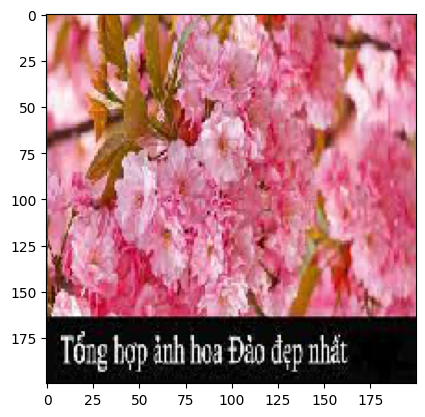

Cái này là:  4.0


In [15]:
image_test=50
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[image_test])
#{1:'Sen', 2:'hoa_sung',3:'hoa_mai',4:'hoa_dao',5:'hoa_hong'}

In [16]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(257, 6)
(55, 6)
(53, 6)


In [17]:

batch_size=128
epochs=50
classes =6

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 5 VGG
model.add(Conv2D(512,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))

model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     



model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [18]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/50
3/3 [==============================] - 7s 1s/step - loss: 2.0435 - accuracy: 0.2140 - val_loss: 2.9869 - val_accuracy: 0.1698
Epoch 2/50
3/3 [==============================] - 1s 161ms/step - loss: 2.3431 - accuracy: 0.2335 - val_loss: 1.6256 - val_accuracy: 0.3396
Epoch 3/50
3/3 [==============================] - 1s 163ms/step - loss: 1.7153 - accuracy: 0.1518 - val_loss: 1.9185 - val_accuracy: 0.1698
Epoch 4/50
3/3 [==============================] - 1s 157ms/step - loss: 1.7734 - accuracy: 0.2257 - val_loss: 1.5631 - val_accuracy: 0.3208
Epoch 5/50
3/3 [==============================] - 1s 207ms/step - loss: 1.5118 - accuracy: 0.3696 - val_loss: 1.6813 - val_accuracy: 0.3774
Epoch 6/50
3/3 [==============================] - 1s 177ms/step - loss: 1.7226 - accuracy: 0.4241 - val_loss: 1.8586 - val_accuracy: 0.3396
Epoch 7/50
3/3 [==============================] - 1s 165ms/step - loss: 1.3336 - accuracy: 0.4942 - val_loss: 1.3479 - val_accuracy: 0.3396
Epoch 8/50
3/3 [=======

In [21]:
model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

Text(0.5, 0, 'Epoch')

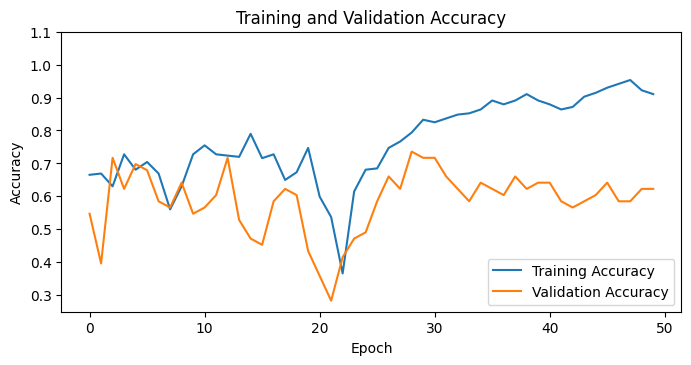

In [22]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')


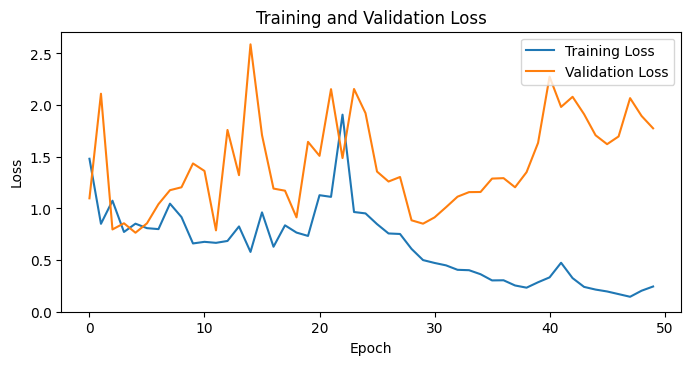

In [23]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

1/1 [==============================] - 0s 101ms/step
Predicted:  hoa_dao


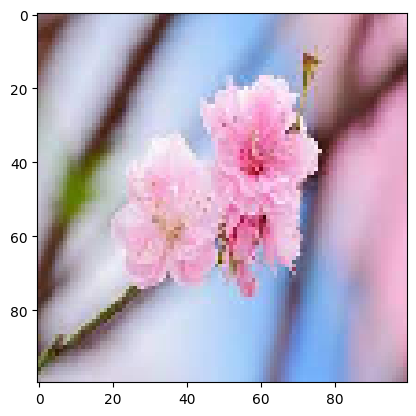

In [ ]:
name={1:'Sen', 2:'hoa_sung',3:'hoa_mai',4:'hoa_dao',5:'hoa_hong'}
#test
filePath = '/content/drive/MyDrive/anh/hoa/hoa_dao (60).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)

In [ ]:

# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=50, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

2/2 [==============================] - 1s 330ms/step
Accuracy: 86.0 %
